In [2]:
from astropy.coordinates import SkyCoord
from astropy.io import ascii
from astropy.io import fits
from astropy.table import Column
from astroquery.mast import Tesscut
from lightkurve import TessTargetPixelFile, TessQualityFlags, TessLightCurve, LombScarglePeriodogram
from lightkurve import search_targetpixelfile, search_tesscut, TessLightCurveFile
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
from random import randint, sample

In [3]:
# Import Light Curve
lc = TessLightCurveFile('DataOutput/LightCurves/TESS_LC_144752281_SEC8.fits').get_lightcurve('FLUX')

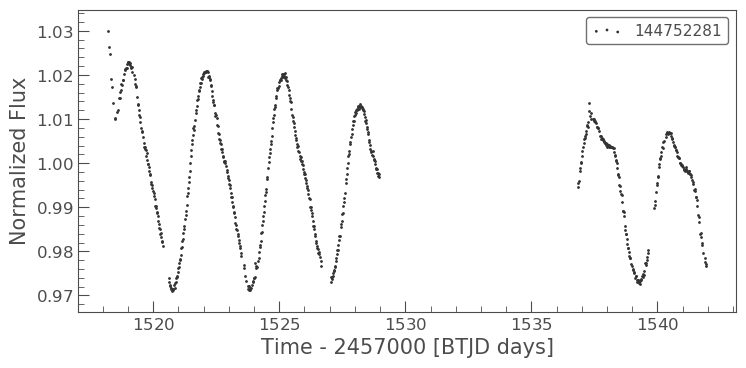

In [7]:
lc.remove_outliers(sigma=2.5).scatter()

In [16]:
# num_terms is the number of terms for which the fourier expansion is done (how complex are the oscillations?)
num_terms = 1
# Min_period is the minimum detectable period
min_period = 4.
# max_period is the maximum detectable period
max_period = 20.

ov_sampling = 10

pg = lc.remove_outliers(sigma=2.5).to_periodogram(method='lombscargle', minimum_period=min_period, maximum_period=max_period,
                                                nterms=num_terms, oversample_factor=ov_sampling)

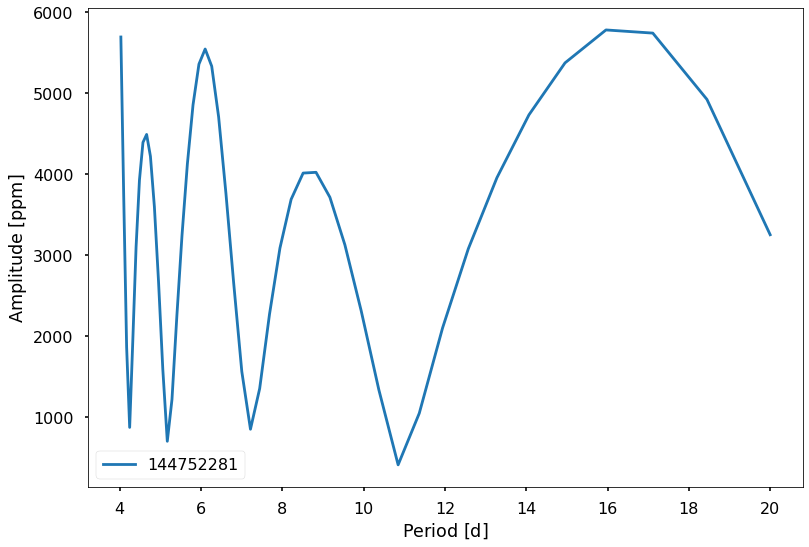

In [17]:
ax = pg.plot(scale='linear', view='period', style=plt.style.available[-2])

In [18]:
# Top 10 periodic signals detected
pg.period[pg.power.argsort()][-10:]

<Quantity [14.06679921,  5.80321114, 18.44410152,  6.26312268,  5.94882177,
           14.95405321,  6.10192762,  4.02835723, 17.11281163, 15.96076804] d>

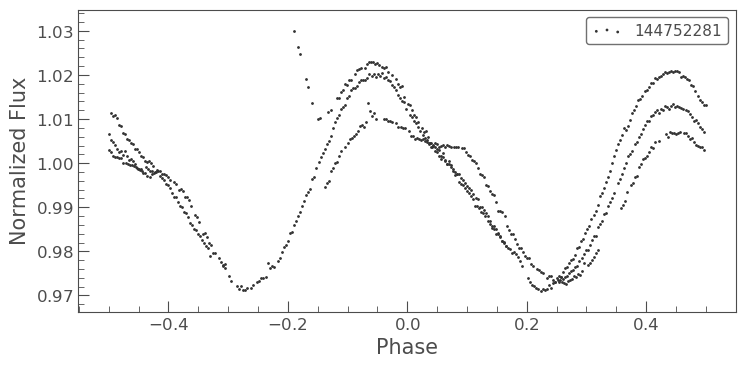

In [20]:
# I think actual period is a bit above 6 days.
lc.remove_outliers(sigma=2.5).fold(period=6.1019276).scatter()